In [62]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Necessary Libraries**

In [129]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')


In [130]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

#**Load Dataset**

In [131]:
df = pd.read_csv('/content/drive/MyDrive/CSE 445/Dataset/startup data.csv')

In [132]:
df.head()

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  \
0      San Diego                     NaN        Bandsintown       1   
1      Los Gatos                     NaN          TriCipher       1   
2      San Diego      San Diego CA 92121              Plixi       1   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0   

  founded_at  closed_at first_funding_at last_funding_at  \
0   1/1/2007        NaN         4/1/2009        1/1/2010   
1   1/1/2000        NaN        2/14/2005      12/28/2009   
2  3/18/2009        NaN        3/30/2010       3/30/2010   
3   1/1/2002        NaN        2/17/2005       4/25/2007   
4   8/1/2010  10/1/2012         8/1/2010        4/1/2012   

   age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.2493                 3.0027                    4.6685   
1                  5.1260                 9.9973                    7.0055   
2                  1.0329                 1.0329                    1.4575   
3                  3.1315                 5.3151                    6.0027   
4                  0.0000                 1.6685                    0.0384   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                   6.7041              3               3             375000   
1                   7.0055              9               4           40100000   
2                   2.2055              5               1            2600000   
3                   6.0027              5               3           40000000   
4                   0.0384              2               2            1300000   

   milestones state_code.1  is_CA  is_NY  is_MA  is_TX  is_otherstate  \
0           3           CA      1      0      0      0              0   
1           1           CA      1      0      0      0              0   
2           2           CA      1      0      0      0              0   
3           1           CA      1      0      0      0              0   
4           1           CA      1      0      0      0              0   

  category_code  is_software  is_web  is_mobile  is_enterprise  \
0         music            0       0          0              0   
1    enterprise            0       0          0              1   
2           web            0       1          0              0   
3      software            1       0          0              0   
4   games_video            0       0          0              0   

   is_advertising  is_gamesvideo  is_ecommerce  is_biotech  is_consulting  \
0               0              0             0           0              0   
1               0              0             0           0              0   
2               0              0             0           0              0   
3               0              0             0           0              0   
4               0              1             0           0              0   

   is_othercategory object_id  has_VC  has_angel  has_roundA  has_roundB  \
0                 1    c:6669       0          1           0           0   
1                 0   c:16283       1          0           0           1   
2                 0   c:65620       0          0           1           0   
3                 0   c:42668       0          0           0           1   
4                 0   c:65806       1          1           0           0   

   has_roundC  has_roundD  avg_participants  is_top500    status  
0           0           0  

# **Data Description**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

# **Data profiling**

In [ ]:
# prompt: install freeze

!pip freeze| grep pandas-profiling

In [ ]:
# prompt: install pandas profiling

!pip install ydata-profiling

In [ ]:
# prompt: panda profiling
# Upgrade ydata_profiling
!pip install --upgrade ydata_profiling

# Check for conflicting installations
!pip show ydata_profiling

# Import the correct function
from ydata_profiling import ProfileReport

# Profile the DataFrame
profile = ProfileReport(df)

# Display the profile report
profile.to_file(output_file="startupsuccess_beforepreprocessing.html")

Name: ydata-profiling
Version: 4.8.3
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/ydataai/ydata-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: dacite, htmlmin, imagehash, jinja2, matplotlib, multimethod, numba, numpy, pandas, phik, pydantic, PyYAML, requests, scipy, seaborn, statsmodels, tqdm, typeguard, visions, wordcloud
Required-by: 


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#**Feature Analysis**

## Method to split date into year, day and month

In [142]:
def year(x):
    return int(x.split('/')[2])
def day(x):
    return int(x.split('/')[1])
def month(x):
    return int(x.split('/')[0])

In [143]:
df['founded_at_year'] = df['founded_at'].apply(year)
df['founded_at_day'] = df['founded_at'].apply(day)
df['founded_at_month'] = df['founded_at'].apply(month)

In [144]:
df['founded_at_year']

0      2007
1      2000
2      2009
3      2002
4      2010
5      2002
6      2005
7      2004
8      2002
9      2005
10     2000
11     2006
12     2004
13     2007
14     2001
15     1999
16     2003
17     2000
18     2010
19     2007
20     2001
21     2004
22     2002
23     2008
24     2007
25     2002
26     2003
27     2008
28     2007
29     2005
30     2007
31     2001
32     2006
33     2011
34     2009
35     2004
36     2007
37     2005
38     2008
39     2006
40     2006
41     2011
42     2008
43     2004
44     2002
45     2003
46     2009
47     2009
48     2010
49     2002
50     2006
51     2009
52     2004
53     2000
54     2006
55     2004
56     2006
57     2005
58     2007
59     2000
60     1999
61     2005
62     2001
63     2001
64     2008
65     2006
66     1999
67     2006
68     2000
69     2005
70     2008
71     2012
72     2006
73     2003
74     2007
75     2003
76     1998
77     2010
78     2006
79     2008
80     2010
81     2008
82     2007
83  

In [145]:
df['first_funding_at_year'] = df['first_funding_at'].apply(year)
df['first_funding_at_day'] = df['first_funding_at'].apply(day)
df['first_funding_at_month'] = df['first_funding_at'].apply(month)

In [146]:
df['last_funding_at_year'] = df['last_funding_at'].apply(year)
df['last_funding_at_day'] = df['last_funding_at'].apply(day)
df['last_funding_at_month'] = df['last_funding_at'].apply(month)

In [147]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'founded_at_year', 'founded_at_day',
       'founded_at_month', 'first_funding_at_year', 'first_funding_at_day',
       'first_funding_at_month', 'last_funding_at_year', 'last_funding_a

In [148]:
df.head()

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  \
0      San Diego                     NaN        Bandsintown       1   
1      Los Gatos                     NaN          TriCipher       1   
2      San Diego      San Diego CA 92121              Plixi       1   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0   

  founded_at  closed_at first_funding_at last_funding_at  \
0   1/1/2007        NaN         4/1/2009        1/1/2010   
1   1/1/2000        NaN        2/14/2005      12/28/2009   
2  3/18/2009        NaN        3/30/2010       3/30/2010   
3   1/1/2002        NaN        2/17/2005       4/25/2007   
4   8/1/2010  10/1/2012         8/1/2010        4/1/2012   

   age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.2493                 3.0027                    4.6685   
1                  5.1260                 9.9973                    7.0055   
2                  1.0329                 1.0329                    1.4575   
3                  3.1315                 5.3151                    6.0027   
4                  0.0000                 1.6685                    0.0384   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                   6.7041              3               3             375000   
1                   7.0055              9               4           40100000   
2                   2.2055              5               1            2600000   
3                   6.0027              5               3           40000000   
4                   0.0384              2               2            1300000   

   milestones state_code.1  is_CA  is_NY  is_MA  is_TX  is_otherstate  \
0           3           CA      1      0      0      0              0   
1           1           CA      1      0      0      0              0   
2           2           CA      1      0      0      0              0   
3           1           CA      1      0      0      0              0   
4           1           CA      1      0      0      0              0   

  category_code  is_software  is_web  is_mobile  is_enterprise  \
0         music            0       0          0              0   
1    enterprise            0       0          0              1   
2           web            0       1          0              0   
3      software            1       0          0              0   
4   games_video            0       0          0              0   

   is_advertising  is_gamesvideo  is_ecommerce  is_biotech  is_consulting  \
0               0              0             0           0              0   
1               0              0             0           0              0   
2               0              0             0           0              0   
3               0              0             0           0              0   
4               0              1             0           0              0   

   is_othercategory object_id  has_VC  has_angel  has_roundA  has_roundB  \
0                 1    c:6669       0          1           0           0   
1                 0   c:16283       1          0           0           1   
2                 0   c:65620       0          0           1           0   
3                 0   c:42668       0          0           0           1   
4                 0   c:65806       1          1           0           0   

   has_roundC  has_roundD  avg_participants  is_top500    status  \
0           0           0 

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [150]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'founded_at_year', 'founded_at_day',
       'founded_at_month', 'first_funding_at_year', 'first_funding_at_day',
       'first_funding_at_month', 'last_funding_at_year', 'last_funding_a

# **Exploratory Data Analysis**

In [ ]:
df['state_code'].value_counts()

state_code
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
DC      4
CT      4
TN      3
RI      3
UT      3
MI      3
MO      2
NH      2
KY      2
ME      2
NV      2
IN      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: count, dtype: int64

### Pie chart of the top 10 most common states

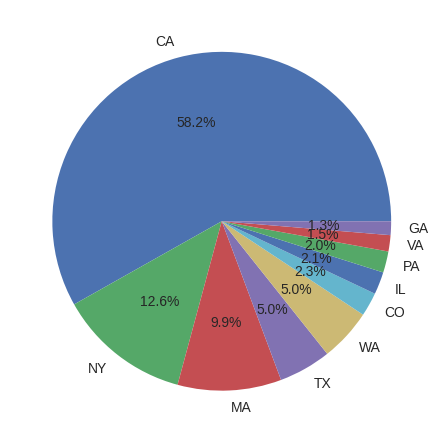

In [ ]:
state_count = df['state_code'].value_counts()
plt.pie(state_count.iloc[0:10], labels = state_count.iloc[0:10].index, autopct = '%1.1f%%', )
plt.show()

In [ ]:
df['category_code'].value_counts()

category_code
software            153
web                 144
mobile               79
enterprise           73
advertising          62
games_video          52
semiconductor        35
network_hosting      34
biotech              34
hardware             27
ecommerce            25
public_relations     25
cleantech            23
security             19
analytics            19
social               14
search               12
other                11
messaging            11
fashion               8
travel                8
news                  8
medical               7
photo_video           7
music                 6
finance               6
education             4
consulting            3
real_estate           3
health                3
automotive            2
manufacturing         2
transportation        2
hospitality           1
sports                1
Name: count, dtype: int64

### Pie Chart of top 10 most common category

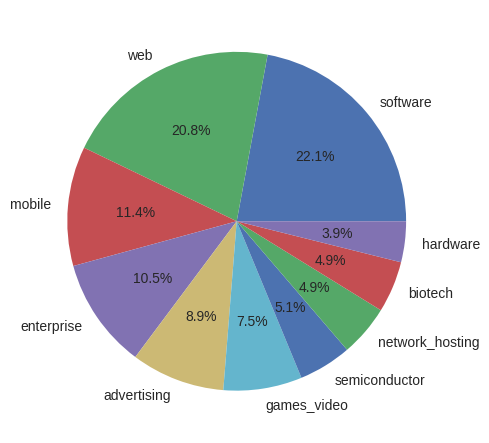

In [ ]:
category = df['category_code'].value_counts()
plt.pie(category.iloc[0:10], labels = category.iloc[0:10].index, autopct = '%1.1f%%')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

## Startup are acquired or closed

In [ ]:
df_acquired = df[(df["status"] == True)]
df_acquired.shape

(597, 48)

In [ ]:
df_closed = df[(df["status"] == False)]
df_closed.shape

(326, 48)

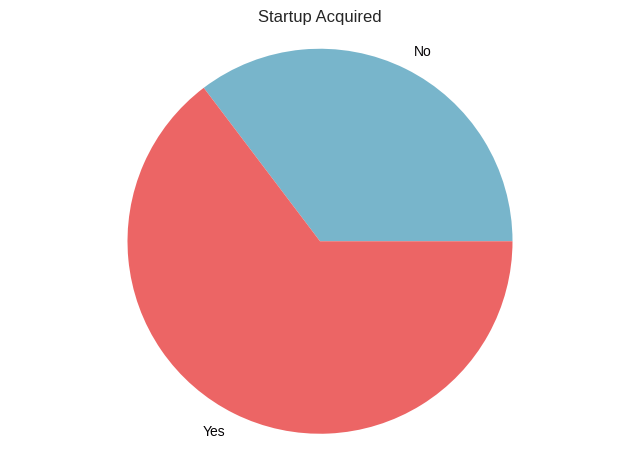

In [ ]:
value_counts = df["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#78B5CB', '#EC6565'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

**Startup have has_VC?**

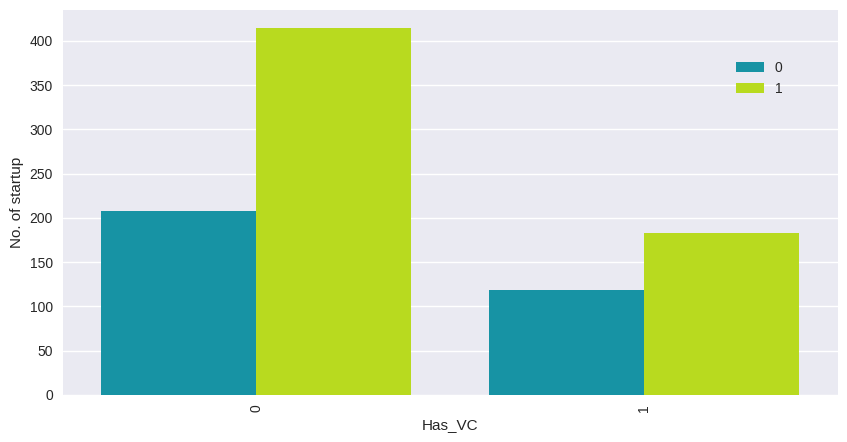

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="has_VC", hue="status", data=df, palette="nipy_spectral",
              order=df.has_VC.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Has_VC", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

<Axes: xlabel='longitude', ylabel='Density'>

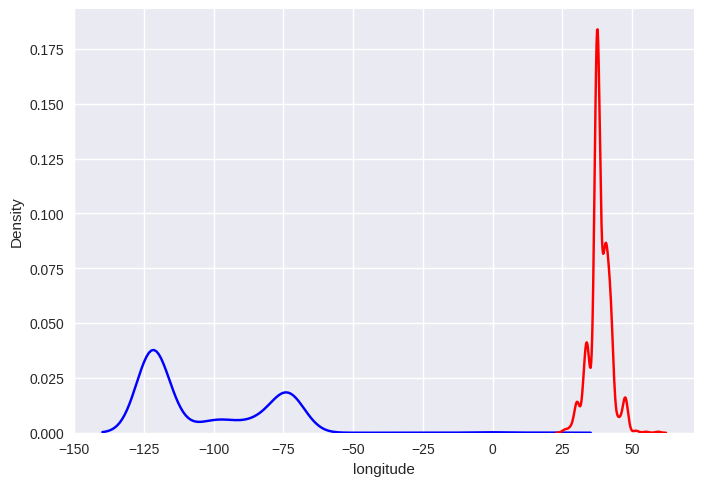

In [ ]:
sns.kdeplot(df, x = 'longitude', color = 'b')
sns.kdeplot(df, x = 'latitude', color = 'r')

In [ ]:
df['longitude'].value_counts()

longitude
-122.419236    46
-73.986614     27
-100.445882    16
-73.997259      9
-71.105616      8
-73.991781      8
-121.966277     8
-71.195611      8
-122.330062     7
-118.244476     7
-122.158332     7
-73.993494      7
-121.940842     7
-122.090370     7
-71.058291      7
-122.072353     6
-71.235800      6
-122.036350     6
-121.990433     5
-97.749908      5
-122.050040     5
-73.999882      5
-122.139809     4
-87.624421      4
-122.093935     4
-121.988572     4
-117.192656     4
-73.949582      4
-122.674195     4
-122.419204     4
-118.487549     4
-84.504243      3
-71.152277      3
-117.825982     3
-79.990086      3
-121.945633     3
-95.712891      3
-97.751010      3
-122.321646     2
-71.514104      2
-122.292146     2
-73.981328      2
-96.676137      2
-122.411025     2
-96.830260      2
-121.959930     2
-122.192337     2
-73.985506      2
-73.983626      2
-73.986951      2
-117.261620     2
-122.325129     2
-77.036646      2
-122.123103     2
-84.390185      2


## kde plot of interrelation between milestone and funding_rounds

<Axes: xlabel='funding_rounds', ylabel='Density'>

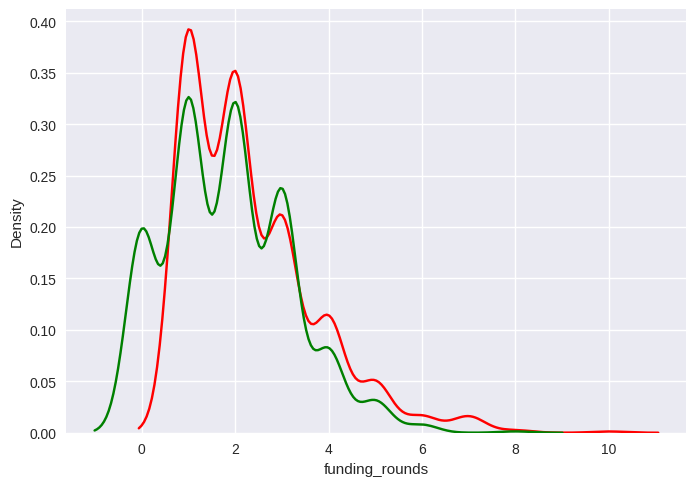

In [ ]:
sns.kdeplot(df, x = 'funding_rounds', color = 'r')
sns.kdeplot(df, x = 'milestones', color = 'g')

In [ ]:
df.head()

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  \
0      San Diego                     NaN        Bandsintown       1   
1      Los Gatos                     NaN          TriCipher       1   
2      San Diego      San Diego CA 92121              Plixi       1   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0   

  founded_at  closed_at first_funding_at last_funding_at  \
0   1/1/2007        NaN         4/1/2009        1/1/2010   
1   1/1/2000        NaN        2/14/2005      12/28/2009   
2  3/18/2009        NaN        3/30/2010       3/30/2010   
3   1/1/2002        NaN        2/17/2005       4/25/2007   
4   8/1/2010  10/1/2012         8/1/2010        4/1/2012   

   age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.2493                 3.0027                    4.6685   
1                  5.1260                 9.9973                    7.0055   
2                  1.0329                 1.0329                    1.4575   
3                  3.1315                 5.3151                    6.0027   
4                  0.0000                 1.6685                    0.0384   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                   6.7041              3               3             375000   
1                   7.0055              9               4           40100000   
2                   2.2055              5               1            2600000   
3                   6.0027              5               3           40000000   
4                   0.0384              2               2            1300000   

   milestones state_code.1  is_CA  is_NY  is_MA  is_TX  is_otherstate  \
0           3           CA      1      0      0      0              0   
1           1           CA      1      0      0      0              0   
2           2           CA      1      0      0      0              0   
3           1           CA      1      0      0      0              0   
4           1           CA      1      0      0      0              0   

  category_code  is_software  is_web  is_mobile  is_enterprise  \
0         music            0       0          0              0   
1    enterprise            0       0          0              1   
2           web            0       1          0              0   
3      software            1       0          0              0   
4   games_video            0       0          0              0   

   is_advertising  is_gamesvideo  is_ecommerce  is_biotech  is_consulting  \
0               0              0             0           0              0   
1               0              0             0           0              0   
2               0              0             0           0              0   
3               0              0             0           0              0   
4               0              1             0           0              0   

   is_othercategory object_id  has_VC  has_angel  has_roundA  has_roundB  \
0                 1    c:6669       0          1           0           0   
1                 0   c:16283       1          0           0           1   
2                 0   c:65620       0          0           1           0   
3                 0   c:42668       0          0           0           1   
4                 0   c:65806       1          1           0           0   

   has_roundC  has_roundD  avg_participants  is_top500    status  \
0           0           0 

## Bar Chart showing the number startus founded in every day of the month

<Axes: xlabel='founded_at_day', ylabel='count'>

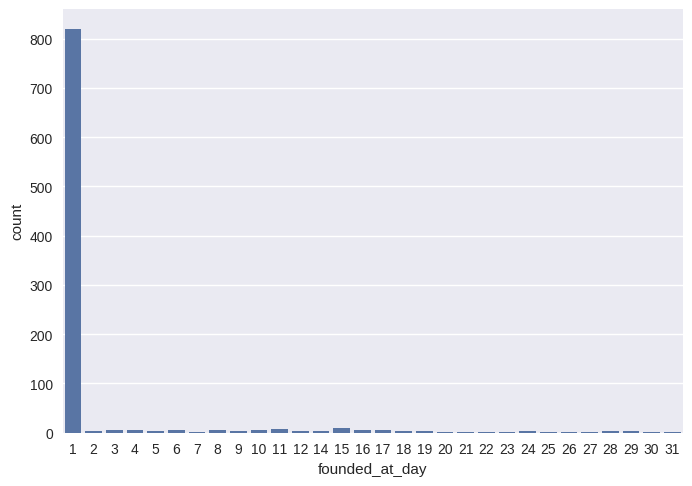

In [ ]:
sns.countplot(df, x = 'founded_at_day')

## Plot showing the distribution of the age of startup at first funding year ,age of startup at last funding year, age of startup at first milestone year , age of startup at last milestone year

<Axes: xlabel='age_first_funding_year', ylabel='Density'>

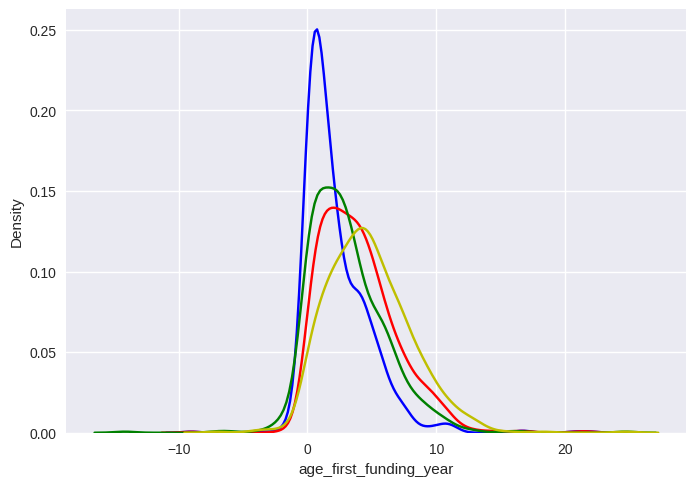

In [ ]:
sns.kdeplot(df, x = 'age_first_funding_year', color = 'b' )
sns.kdeplot(df, x = 'age_last_funding_year', color = 'r')
sns.kdeplot(df, x = 'age_first_milestone_year', color = 'g')
sns.kdeplot(df, x = 'age_last_milestone_year', color = 'y')

## ploting the location of the startups on map using the lattitude and longitude

In [ ]:
latitude_initial = 39.8283
longitude_initial = -50.0000

map = folium.Map(location = [latitude_initial, longitude_initial],
                  zoom_start = 3, tiles = 'cartodbpositron')


for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup = row['state_code']).add_to(map)

map

# **Data Preprocessing**

In [169]:
len(df.columns)

58

In [170]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'founded_at_year', 'founded_at_day',
       'founded_at_month', 'first_funding_at_year', 'first_funding_at_day',
       'first_funding_at_month', 'last_funding_at_year', 'last_funding_a

## Droping unnecessay features as data cleaning

In [171]:
df.drop(['Unnamed: 0', 'id','Unnamed: 6', 'name', 'labels', 'closed_at',
         'state_code.1', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
         'is_otherstate', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'founded_at', 'first_funding_at', 'last_funding_at'], inplace = True, axis = 1)

In [172]:
print(df.columns)
print(len(df.columns))

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'city',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
       'has_roundD', 'avg_participants', 'is_top500', 'status',
       'founded_at_year', 'founded_at_day', 'founded_at_month',
       'first_funding_at_year', 'first_funding_at_day',
       'first_funding_at_month', 'last_funding_at_year', 'last_funding_at_day',
       'last_funding_at_month'],
      dtype='object')
32


## Heatmap of the missing values in some features

<Axes: >

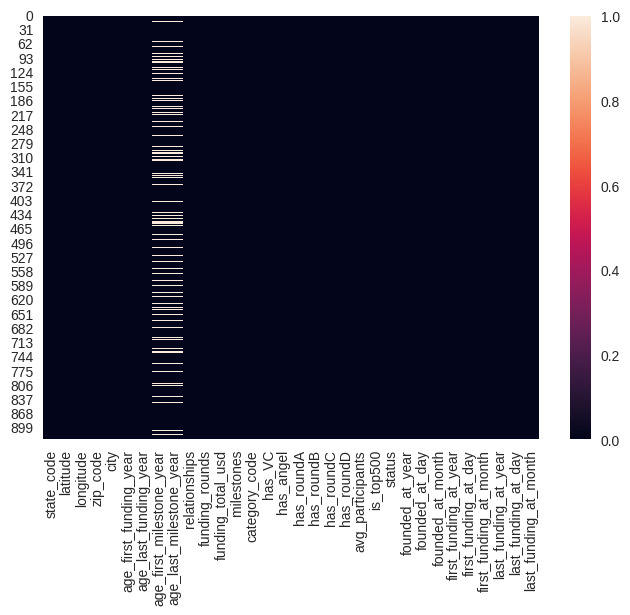

In [173]:
sns.heatmap(df[df.columns].isna() )


## Handling the missing values of age_first_milestone_year and age_last_milestone_year

In [174]:
df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].median(), inplace = True)
df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].median(), inplace = True)

<Axes: >

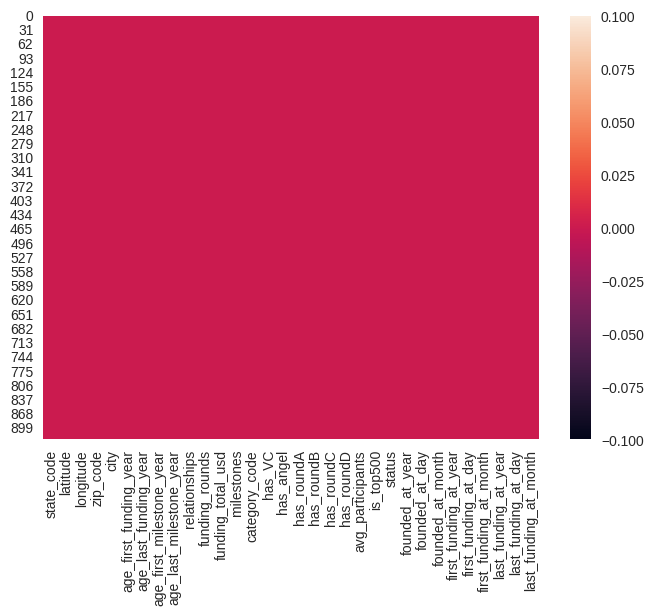

In [175]:
sns.heatmap(df[df.columns].isna() )

In [176]:
df.head(10)

state_code   latitude   longitude zip_code           city  \
0         CA  42.358880  -71.056820    92101      San Diego   
1         CA  37.238916 -121.973718    95032      Los Gatos   
2         CA  32.901049 -117.192656    92121      San Diego   
3         CA  37.320309 -122.050040    95014      Cupertino   
4         CA  37.779281 -122.419236    94105  San Francisco   
5         CA  37.406914 -122.090370    94043  Mountain View   
6         CA  37.391559 -122.070264    94041  Mountain View   
7         CA  38.057107 -122.513742    94901     San Rafael   
8         MA  42.712207  -73.203599     1267   Williamstown   
9         CA  37.427235 -122.145783    94306      Palo Alto   

   age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.2493                 3.0027                    4.6685   
1                  5.1260                 9.9973                    7.0055   
2                  1.0329                 1.0329                    1.4575   
3                  3.1315                 5.3151                    6.0027   
4                  0.0000                 1.6685                    0.0384   
5                  4.5452                 4.5452                    5.0027   
6                  1.7205                 5.2110                    3.0000   
7                  1.6466                 6.7616                    5.6055   
8                  3.5863                11.1123                    8.0055   
9                  1.6712                 4.6849                    2.9178   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                   6.7041              3               3             375000   
1                   7.0055              9               4           40100000   
2                   2.2055              5               1            2600000   
3                   6.0027              5               3           40000000   
4                   0.0384              2               2            1300000   
5                   5.0027              3               1            7500000   
6                   6.6082              6               3           26000000   
7                   7.3616             25               3           34100000   
8                   9.9945             13               3            9650000   
9                   6.1151             14               3            5750000   

   milestones    category_code  has_VC  has_angel  has_roundA  has_roundB  \
0           3            music       0          1           0           0   
1           1       enterprise       1          0           0           1   
2           2              web       0          0           1           0   
3           1         software       0          0           0           1   
4           1      games_video       1          1           0           0   
5           1  network_hosting       0          0           0           1   
6           2         software       1          0           1           1   
7           3          finance       0          0           1           1   
8           4           mobile       1          0           1           0   
9           4              web       1          1           1           0   

   has_roundC  has_roundD  avg_participants  is_top500    status  \
0           0           0            1.0000          0  acquired   
1           1           1            4.7500          1  acquired   
2           0           0            4.0000          1  acquired   
3           1           1            3.3333          1  acquired   
4           0           0            1.0000          1    closed   
5           0           0            3.0000          1    closed   
6           0           0            1.6667          1  acquired   
7           0           1            3.5000          1  acquired   
8           0           1            4.0000          1  acquired   
9           0           0            1.0

In [270]:
#Null values checking after handling missing values of all column
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

## categorical columns

In [177]:
cat_columns = df.select_dtypes(include=['object'])

In [178]:
cat_columns.head()

state_code zip_code           city category_code    status
0         CA    92101      San Diego         music  acquired
1         CA    95032      Los Gatos    enterprise  acquired
2         CA    92121      San Diego           web  acquired
3         CA    95014      Cupertino      software  acquired
4         CA    94105  San Francisco   games_video    closed

## Applying label encoder and encode all the categorical columns

In [179]:
le = LabelEncoder()

In [180]:
for column in cat_columns.columns:
    df[column] = le.fit_transform(df[column])

In [181]:
df.head()

state_code   latitude   longitude  zip_code  city  age_first_funding_year  \
0           2  42.358880  -71.056820       250   173                  2.2493   
1           2  37.238916 -121.973718       336   108                  5.1260   
2           2  32.901049 -117.192656       251   173                  1.0329   
3           2  37.320309 -122.050040       333    55                  3.1315   
4           2  37.779281 -122.419236       295   174                  0.0000   

   age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
0                 3.0027                    4.6685                   6.7041   
1                 9.9973                    7.0055                   7.0055   
2                 1.0329                    1.4575                   2.2055   
3                 5.3151                    6.0027                   6.0027   
4                 1.6685                    0.0384                   0.0384   

   relationships  funding_rounds  funding_total_usd  milestones  \
0              3               3             375000           3   
1              9               4           40100000           1   
2              5               1            2600000           2   
3              5               3           40000000           1   
4              2               2            1300000           1   

   category_code  has_VC  has_angel  has_roundA  has_roundB  has_roundC  \
0             19       0          1           0           0           0   
1              8       1          0           0           1           1   
2             34       0          0           1           0           0   
3             30       0          0           0           1           1   
4             11       1          1           0           0           0   

   has_roundD  avg_participants  is_top500  status  founded_at_year  \
0           0            1.0000          0       0             2007   
1           1            4.7500          1       0             2000   
2           0            4.0000          1       0             2009   
3           1            3.3333          1       0             2002   
4           0            1.0000          1       1             2010   

   founded_at_day  founded_at_month  first_funding_at_year  \
0               1                 1                   2009   
1               1                 1                   2005   
2              18                 3                   2010   
3               1                 1                   2005   
4               1                 8                   2010   

   first_funding_at_day  first_funding_at_month  last_funding_at_year  \
0                     1                       4                  2010   
1                    14                       2                  2009   
2                    30                       3                  2010   
3                    17                       2                  2007   
4                     1                       8                  2012   

   last_funding_at_day  last_funding_at_month  
0                    1                      1  
1                   28                     12  
2                   30                      3  
3                   25                      4  
4                    1                      4

## Creating variable features and target feature

In [182]:
x = df.drop('status', axis = 1)
y = df['status']

# **Features importance analysis using Random Forest**

In [183]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)


importances = rf.feature_importances_


print("Feature Importances:")
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance:.4f}")


Feature Importances:
Feature 0: 0.0137
Feature 1: 0.0388
Feature 2: 0.0322
Feature 3: 0.0355
Feature 4: 0.0301
Feature 5: 0.0569
Feature 6: 0.0527
Feature 7: 0.0531
Feature 8: 0.0708
Feature 9: 0.1316
Feature 10: 0.0227
Feature 11: 0.0716
Feature 12: 0.0485
Feature 13: 0.0288
Feature 14: 0.0064
Feature 15: 0.0032
Feature 16: 0.0071
Feature 17: 0.0077
Feature 18: 0.0057
Feature 19: 0.0035
Feature 20: 0.0409
Feature 21: 0.0263
Feature 22: 0.0412
Feature 23: 0.0054
Feature 24: 0.0134
Feature 25: 0.0211
Feature 26: 0.0289
Feature 27: 0.0276
Feature 28: 0.0219
Feature 29: 0.0283
Feature 30: 0.0245


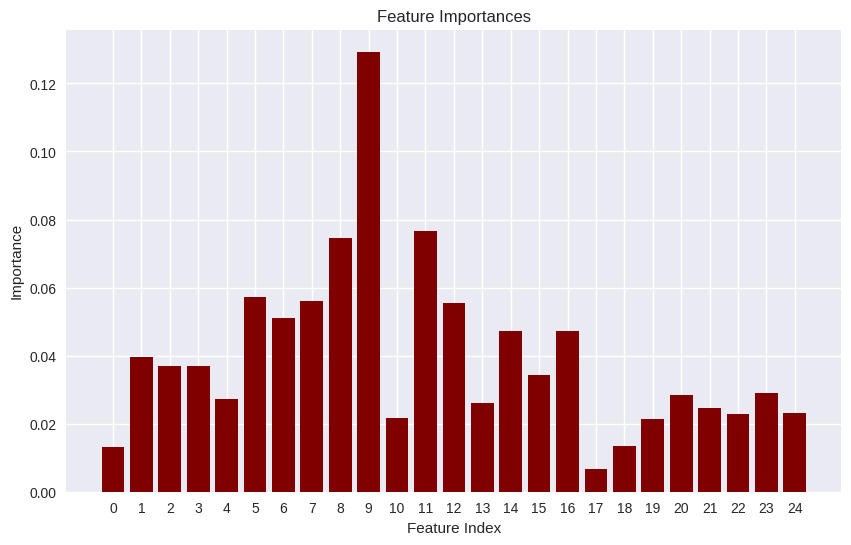

In [275]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming x and y are your feature matrix and target vector respectively
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)

importances = rf.feature_importances_

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, color="maroon")
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.xticks(range(len(importances)), range(len(importances)))
plt.show()


In [184]:
# prompt: show most important feature column name

most_important_feature_index = np.argmax(importances)
most_important_feature_name = x.columns[most_important_feature_index]
print(f"Most important feature: {most_important_feature_name}")


Most important feature: relationships


In [185]:
# prompt: show target class

print(df['status'].value_counts())


status
0    597
1    326
Name: count, dtype: int64


In [186]:
x.drop(x.columns[14:20], inplace = True, axis = 1)


In [187]:
df.head()

state_code   latitude   longitude  zip_code  city  age_first_funding_year  \
0           2  42.358880  -71.056820       250   173                  2.2493   
1           2  37.238916 -121.973718       336   108                  5.1260   
2           2  32.901049 -117.192656       251   173                  1.0329   
3           2  37.320309 -122.050040       333    55                  3.1315   
4           2  37.779281 -122.419236       295   174                  0.0000   

   age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
0                 3.0027                    4.6685                   6.7041   
1                 9.9973                    7.0055                   7.0055   
2                 1.0329                    1.4575                   2.2055   
3                 5.3151                    6.0027                   6.0027   
4                 1.6685                    0.0384                   0.0384   

   relationships  funding_rounds  funding_total_usd  milestones  \
0              3               3             375000           3   
1              9               4           40100000           1   
2              5               1            2600000           2   
3              5               3           40000000           1   
4              2               2            1300000           1   

   category_code  has_VC  has_angel  has_roundA  has_roundB  has_roundC  \
0             19       0          1           0           0           0   
1              8       1          0           0           1           1   
2             34       0          0           1           0           0   
3             30       0          0           0           1           1   
4             11       1          1           0           0           0   

   has_roundD  avg_participants  is_top500  status  founded_at_year  \
0           0            1.0000          0       0             2007   
1           1            4.7500          1       0             2000   
2           0            4.0000          1       0             2009   
3           1            3.3333          1       0             2002   
4           0            1.0000          1       1             2010   

   founded_at_day  founded_at_month  first_funding_at_year  \
0               1                 1                   2009   
1               1                 1                   2005   
2              18                 3                   2010   
3               1                 1                   2005   
4               1                 8                   2010   

   first_funding_at_day  first_funding_at_month  last_funding_at_year  \
0                     1                       4                  2010   
1                    14                       2                  2009   
2                    30                       3                  2010   
3                    17                       2                  2007   
4                     1                       8                  2012   

   last_funding_at_day  last_funding_at_month  
0                    1                      1  
1                   28                     12  
2                   30                      3  
3                   25                      4  
4                    1                      4

# **Train Test split**

In [188]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = df.drop('status', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not
                                # made inplace as we have not used 'inplace = True'

y = df['status'] # Output/Dependent variable

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [190]:
# lets print the shapes again
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (738, 31)
Shape of the y Train : (738,)
Shape of the X test : (185, 31)
Shape of the y test : (185,)


In [191]:
import pandas as pd

# Check for missing values in X_train and X_test
missing_values_train = X_train.isna().sum().sum()
missing_values_test = X_test.isna().sum().sum()

# Print the number of missing values
print(f"Missing values in X_train: {missing_values_train}")
print(f"Missing values in X_test: {missing_values_test}")

Missing values in X_train: 0
Missing values in X_test: 0


# **Applying Models**

In [192]:
#Cek categorical
cat_feature = df.select_dtypes(include='object')
cat_feature.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

**Model building**

In [193]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

## XGBoost Classifier

In [194]:
!pip install xgboost

Training Accuracy: 0.8401084010840109
Testing Accuracy: 0.8054054054054054
                                  
Cross-Validation Scores: [0.77027027 0.80405405 0.76351351 0.82312925 0.80272109]
Mean Cross-Validation Score: 0.7927376355947785
                                  


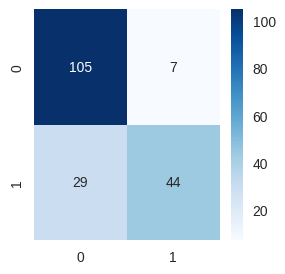

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       112
           1       0.86      0.60      0.71        73

    accuracy                           0.81       185
   macro avg       0.82      0.77      0.78       185
weighted avg       0.81      0.81      0.80       185

                                  
Precision = 0.8627450980392157
Recall = 0.6027397260273972
F1 Score = 0.7096774193548387
ROC AUC = 0.8592832681017614


In [195]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Train
xgb = XGBClassifier(n_estimators=300,max_depth=2, random_state=150, learning_rate=0.02)
xgb.fit(X_train, y_train)

# Predict
y_predicted_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print accuracy
print("Training Accuracy:", xgb.score(X_train, y_train))
print("Testing Accuracy:", xgb.score(X_test, y_test))
print("                                  ")

# Perform cross-validation
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Evaluation
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)
print(cr)
print("                                  ")

# Precision and Recall
precision = precision_score(y_test, y_predicted_xgb)
recall = recall_score(y_test, y_predicted_xgb)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_predicted_xgb)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
print("ROC AUC =", roc_auc)


## K-Nearest Neighbors Algorithm

Training Accuracy: 0.7032520325203252
Testing Accuracy: 0.6432432432432432
                               
Cross-Validation Scores: [0.70945946 0.7027027  0.72297297 0.67346939 0.67346939]
Mean Cross-Validation Score: 0.6964147821290678
                                  


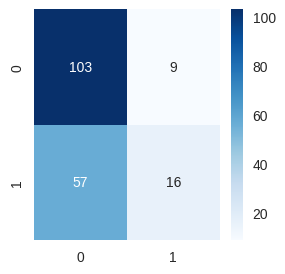

              precision    recall  f1-score   support

           0       0.64      0.92      0.76       112
           1       0.64      0.22      0.33        73

    accuracy                           0.64       185
   macro avg       0.64      0.57      0.54       185
weighted avg       0.64      0.64      0.59       185

                               
Precision = 0.64
Recall = 0.2191780821917808
F1 Score = 0.32653061224489793


In [241]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Initialize the k-NN classifier with additional hyperparameters
knn = KNeighborsClassifier(
    n_neighbors=150,  # Number of neighbors to use
    weights='uniform',  # or 'distance'
    algorithm='auto',  # 'ball_tree', 'kd_tree', 'brute'
    leaf_size=25,  # Leaf size for 'ball_tree' or 'kd_tree'
    p=3,  # Power parameter for Minkowski metric (1=Manhattan, 2=Euclidean)
    metric='minkowski',  # Distance metric to use
    metric_params=None,  # Additional keyword arguments for the metric function
    n_jobs=-1  # Number of parallel jobs to run
)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print training and testing accuracy
print("Training Accuracy:", knn.score(X_train, y_train))
print("Testing Accuracy:", knn.score(X_test, y_test))

print("                               ")
# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Evaluate the model
cm = confusion_matrix(y_test, y_pred_knn)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_pred_knn)
print(cr)

print("                               ")

# Precision and Recall
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_pred_knn)
print("F1 Score =", f1)


##DecisionTree Classifier

Training Accuracy: 0.8170731707317073
Testing Accuracy: 0.7081081081081081
                               
Cross-Validation Scores: [0.80405405 0.72972973 0.74324324 0.76870748 0.70068027]
Mean Cross-Validation Score: 0.7492829564258137
                                  


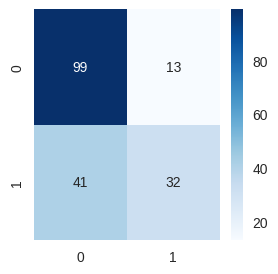

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       112
           1       0.71      0.44      0.54        73

    accuracy                           0.71       185
   macro avg       0.71      0.66      0.66       185
weighted avg       0.71      0.71      0.69       185

                               
Precision = 0.7111111111111111
Recall = 0.4383561643835616
F1 Score = 0.5423728813559321
ROC AUC = 0.7945205479452054


In [200]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Initialize the classifier with additional hyperparameters
dt = DecisionTreeClassifier(
    criterion='gini',  # or 'entropy'
    splitter='best',  # or 'random'
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=6,
    max_features=None,  # or a number or 'auto', 'sqrt', 'log2'
    max_leaf_nodes=None,  # or an integer
    min_impurity_decrease=0.0,
    class_weight=None,  # or a dictionary {class_label: weight}
    random_state=100
)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


# Print training and testing accuracy
print("Training Accuracy:", dt.score(X_train, y_train))
print("Testing Accuracy:", dt.score(X_test, y_test))

print("                               ")
# Perform cross-validation
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Evaluate the model
cm = confusion_matrix(y_test, y_pred_dt)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_pred_dt)
print(cr)

print("                               ")

# Precision and Recall
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_pred_dt)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_dt)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)
print("ROC AUC =", roc_auc)

## GradientBoosting Classifier

Training Accuracy: 0.8428184281842819
Testing Accuracy: 0.8162162162162162
                               
Cross-Validation Scores: [0.76351351 0.78378378 0.77702703 0.81632653 0.80272109]
Mean Cross-Validation Score: 0.7886743886743888
                                  


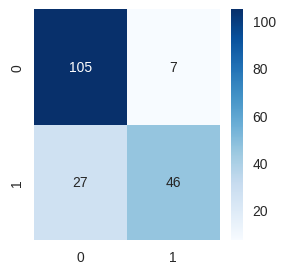

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       112
           1       0.87      0.63      0.73        73

    accuracy                           0.82       185
   macro avg       0.83      0.78      0.80       185
weighted avg       0.82      0.82      0.81       185

                                                
Precision = 0.8679245283018868
Recall = 0.6301369863013698
F1 Score = 0.73015873015873
ROC AUC = 0.861912915851272


In [202]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Initialize the classifier with additional hyperparameters
gbc = GradientBoostingClassifier(
    learning_rate=0.01,  # Controls the contribution of each tree
    n_estimators=500,    # Number of boosting stages
    max_depth=2,         # Maximum depth of each tree
    subsample=0.8,       # Fraction of samples used for fitting each tree
    min_samples_split=20,# Minimum number of samples required to split an internal node
    random_state=100
)

# Train the model
gbc.fit(X_train, y_train)

# Predict on the test set
y_predicted_gb = gbc.predict(X_test)
y_pred_proba_gb = gbc.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print training and testing accuracy
print("Training Accuracy:", gbc.score(X_train, y_train))
print("Testing Accuracy:", gbc.score(X_test, y_test))
print("                               ")

# Perform cross-validation
cv_scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Evaluate the model
cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)
print("                                                ")

# Precision and Recall
precision = precision_score(y_test, y_predicted_gb)
recall = recall_score(y_test, y_predicted_gb)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_predicted_gb)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_gb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gb)
print("ROC AUC =", roc_auc)


## AdaBoost Classifier

Training Accuracy: 0.8279132791327913
Testing Accuracy: 0.8162162162162162
                               
Cross-Validation Scores: [0.77702703 0.81081081 0.78378378 0.82993197 0.76870748]
Mean Cross-Validation Score: 0.794052215480787
                                  


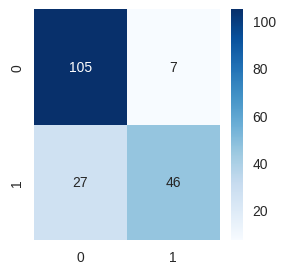

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       112
           1       0.87      0.63      0.73        73

    accuracy                           0.82       185
   macro avg       0.83      0.78      0.80       185
weighted avg       0.82      0.82      0.81       185

                                        
Precision = 0.8679245283018868
Recall = 0.6301369863013698
F1 Score = 0.73015873015873
ROC AUC = 0.8499266144814089


In [213]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Train
ada = AdaBoostClassifier(n_estimators=375,
                         learning_rate=0.03,
                         algorithm='SAMME.R',
                         random_state=50)

ada.fit(X_train, y_train)

# Predict
y_predicted_ab = ada.predict(X_test)
y_pred_proba_ab = ada.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

print("Training Accuracy:", ada.score(X_train, y_train))
print("Testing Accuracy:", ada.score(X_test, y_test))
print("                               ")

# Perform cross-validation
cv_scores = cross_val_score(ada, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Confusion matrix
cm = confusion_matrix(y_test, y_predicted_ab)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

# Classification report
cr = classification_report(y_test, y_predicted_ab)
print(cr)
print("                                        ")

# Precision and Recall
precision = precision_score(y_test, y_predicted_ab)
recall = recall_score(y_test, y_predicted_ab)
f1 = f1_score(y_test, y_predicted_ab)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_ab)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_ab)
print("ROC AUC =", roc_auc)

## Light GradientBoosting Machine Classifer

In [214]:
!pip install lightgbm

[LightGBM] [Info] Number of positive: 253, number of negative: 485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2333
[LightGBM] [Info] Number of data points in the train set: 738, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342818 -> initscore=-0.650759
[LightGBM] [Info] Start training from score -0.650759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

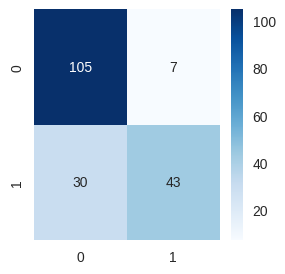

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       112
           1       0.86      0.59      0.70        73

    accuracy                           0.80       185
   macro avg       0.82      0.76      0.77       185
weighted avg       0.81      0.80      0.79       185

                                  
Precision = 0.86
Recall = 0.589041095890411
F1 Score = 0.6991869918699187
ROC AUC = 0.8505381604696672


In [217]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize LGBMClassifier with parameters to avoid overfitting
lgb = LGBMClassifier(
    num_leaves=20,           # Reduce number of leaves to avoid overfitting
    max_depth=2,             # Reduce max depth of the tree
    learning_rate=0.02,      # Decrease learning rate
    n_estimators=450,        # Increase number of boosting iterations
    reg_alpha=0.2,           # Add L1 regularization term
    reg_lambda=0.7,          # Add L2 regularization term
    objective='binary',      # Objective function
    subsample=0.8,           # Subsample ratio of the training instance
    colsample_bytree=0.8,    # Subsample ratio of columns when constructing each tree
    random_state=70,         # Random number seed for reproducibility
    n_jobs=-1                # Number of parallel threads
)

# Train the model with early stopping
lgb.fit(X_train,y_train)

# Predict
y_predicted_lgb = lgb.predict(X_test)
y_pred_proba_lgb = lgb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print accuracy
print("Training Accuracy:", lgb.score(X_train, y_train))
print("Testing Accuracy:", lgb.score(X_test, y_test))
print("                                  ")

# Perform cross-validation
cv_scores = cross_val_score(lgb, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")
# Print accuracy
print("Training Accuracy:", lgb.score(X_train, y_train))
print("Testing Accuracy:", lgb.score(X_test, y_test))
print("                        ")
# Evaluation
cm = confusion_matrix(y_test, y_predicted_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_predicted_lgb)
print(cr)
print("                                  ")

# Precision and Recall
precision = precision_score(y_test, y_predicted_lgb)
recall = recall_score(y_test, y_predicted_lgb)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_predicted_lgb)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_lgb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lgb)
print("ROC AUC =", roc_auc)

## Random Forest

Training Accuracy: 0.8455284552845529
Testing Accuracy: 0.7891891891891892
                               
Cross-Validation Scores: [0.78378378 0.79054054 0.79054054 0.82993197 0.7414966 ]
Mean Cross-Validation Score: 0.7872586872586873
                                  


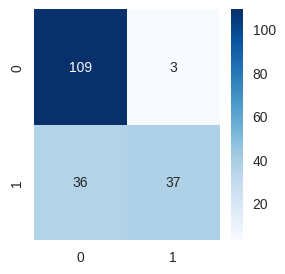

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       112
           1       0.93      0.51      0.65        73

    accuracy                           0.79       185
   macro avg       0.84      0.74      0.75       185
weighted avg       0.82      0.79      0.77       185

Precision = 0.925
Recall = 0.5068493150684932
F1 Score = 0.6548672566371682
ROC AUC = 0.8504158512720157


In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
rf = RandomForestClassifier(max_depth=4, random_state=85, n_estimators=500)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print accuracy
print("Training Accuracy:", rf.score(X_train, y_train))
print("Testing Accuracy:", rf.score(X_test, y_test))
print("                               ")

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

# Classification report
cr = classification_report(y_test, y_pred_rf)
print(cr)

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
print("ROC AUC =", roc_auc)

Training Accuracy: 0.3875338753387534
Testing Accuracy: 0.42702702702702705
                               
Cross-Validation Scores: [0.40540541 0.36486486 0.65540541 0.36054422 0.38095238]
Mean Cross-Validation Score: 0.4334344548630263
                                  


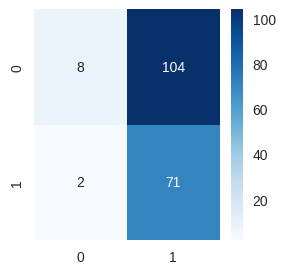

              precision    recall  f1-score   support

           0       0.80      0.07      0.13       112
           1       0.41      0.97      0.57        73

    accuracy                           0.43       185
   macro avg       0.60      0.52      0.35       185
weighted avg       0.64      0.43      0.31       185

                                                
Precision = 0.4057142857142857
Recall = 0.9726027397260274
F1 Score = 0.5725806451612904
ROC AUC = 0.42184442270058703


In [244]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Initialize the Gaussian Naive Bayes classifier with parameters
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict on the test set
y_predicted_gnb = gnb.predict(X_test)
y_pred_proba_gnb = gnb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print training and testing accuracy
print("Training Accuracy:", gnb.score(X_train, y_train))
print("Testing Accuracy:", gnb.score(X_test, y_test))
print("                               ")

# Perform cross-validation
cv_scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Evaluate the model
cm = confusion_matrix(y_test, y_predicted_gnb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gnb)
print(cr)
print("                                                ")

# Precision and Recall
precision = precision_score(y_test, y_predicted_gnb)
recall = recall_score(y_test, y_predicted_gnb)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_predicted_gnb)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_gnb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gnb)
print("ROC AUC =", roc_auc)

#**Ensemble model on the best classifier**

## XGBoosting Classifier

In [242]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
params = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}
# Initialize the XGBClassifier
XGB = XGBClassifier()

# Initialize RandomizedSearchCV
random = RandomizedSearchCV(estimator=XGB, param_distributions=params, n_iter=1000, scoring='accuracy')

# Fit RandomizedSearchCV to the data (x and y should be defined as your feature matrix and target vector)
random.fit(X_train, y_train)

# Print the best score
print(random.best_score_)

0.8022154807869093


## Gradient Boosting Classifier

In [265]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
params = {
    "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    "n_estimators": [50, 100, 150, 200, 250],
    "max_depth": [3, 4, 5, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "max_features": ["auto", "sqrt", "log2"],
}

# Initialize the GradientBoostingClassifier
Gradientboost = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
random1 = RandomizedSearchCV(estimator=Gradientboost, param_distributions=params, n_iter=100, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the data (x and y should be defined as your feature matrix and target vector)
random1.fit(X_train, y_train)

# Print the best score
print(random1.best_score_)


0.8022430593859167


## Random Forest

In [266]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
random2 = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=30, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the data (x and y should be defined as your feature matrix and target vector)
random2.fit(X_train, y_train)

# Print the best score
print(random2.best_score_)

0.7954403382974812


## Light Gradient Boosting Machine

In [267]:
# Import necessary libraries
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.2, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.2, 0.5, 1.0],
}

# Initialize the LGBMClassifier
lgbm = LGBMClassifier()

# Initialize RandomizedSearchCV
random3 = RandomizedSearchCV(estimator=lgbm, param_distributions=params, n_iter=30, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the data (x and y should be defined as your feature matrix and target vector)
random3.fit(X_train, y_train)

# Print the best score
print(random3.best_score_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## Ensemble Model

In [268]:
# prompt: import VotingClassifier

from sklearn.ensemble import VotingClassifier

In [269]:
voting = VotingClassifier([
    ('estimator1', random.best_estimator_),
    ('estimator2', random1.best_estimator_),
    ('estimator3', random2.best_estimator_),
    ('estimator4', random3.best_estimator_)]

)
voting.fit(X_train, y_train)
# Print training and testing accuracy
print("Training Accuracy:", voting.score(X_train, y_train))
print("Testing Accuracy:", voting.score(X_test, y_test))
print("                                  ")
# Perform cross-validation
cv_scores = cross_val_score(voting, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 253, number of negative: 485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2333
[LightGBM] [Info] Number of data points in the train set: 738, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342818 -> initscore=-0.650759
[LightGBM] [Info] Start training from score -0.650759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

#**Explainable AI(XAI)**

## Explainable AI on GradientBoost Classifier

In [245]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.8 MB/s eta 0:00:00


In [246]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model (assuming X_train and y_train are already defined)
gbc = GradientBoostingClassifier( learning_rate=0.01,  # Controls the contribution of each tree
    n_estimators=500,    # Number of boosting stages
    max_depth=2,         # Maximum depth of each tree
    subsample=0.8,       # Fraction of samples used for fitting each tree
    min_samples_split=20,# Minimum number of samples required to split an internal node
    random_state=100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2,
                           min_samples_split=20, n_estimators=500,
                           random_state=100, subsample=0.8)

In [247]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(gbc, X_train)
shap_values = explainer(X_test)


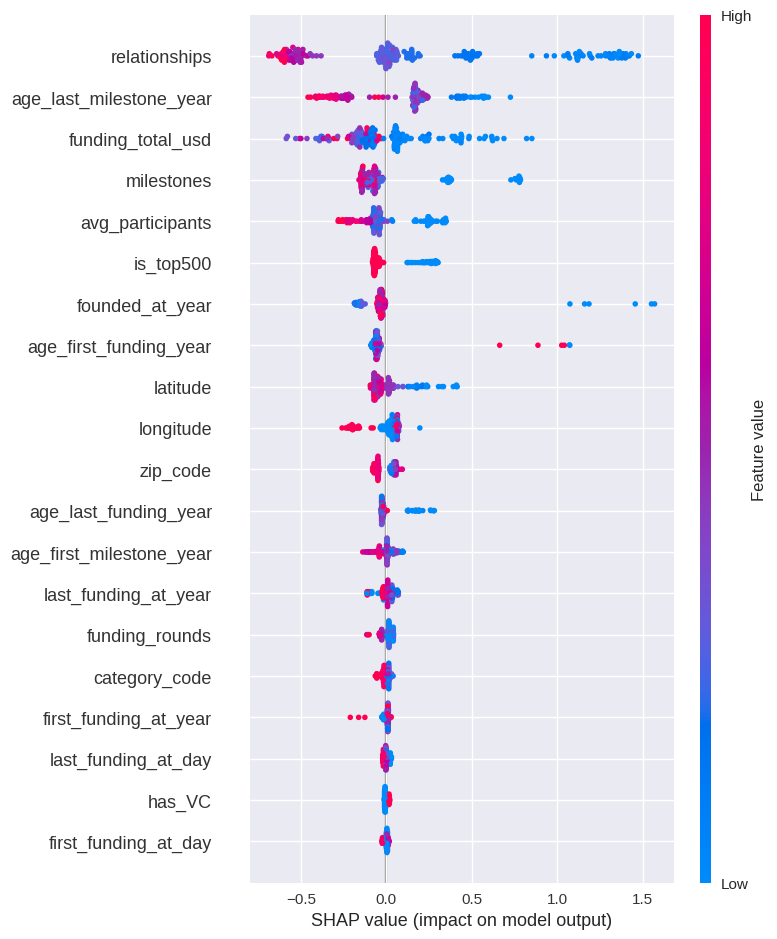

In [248]:
# Summary plot
shap.summary_plot(shap_values, X_test)


In [249]:
# Force plot for a single prediction
import matplotlib.pyplot as plt

shap.initjs()
# Visualize the contribution of each feature to the first prediction
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])


In [250]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=00b00bded41861b739b91885a12c04ffc5c6a06b9a3ea14b591a1e1db0bbf64e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [255]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train.values,
    mode='classification',
    feature_names=X_train.columns)
exp = explainer.explain_instance(X_test.iloc[3], gbc.predict_proba)
exp.show_in_notebook(show_table = True)

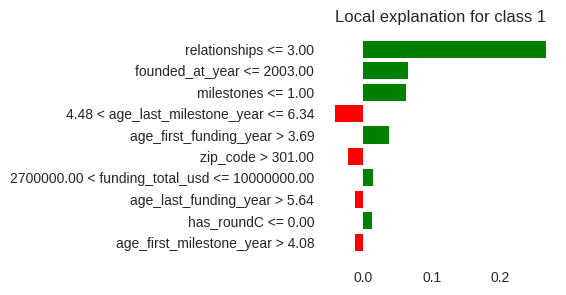

In [257]:
import matplotlib.pyplot as plt

# Generate the LIME plot
fig = exp.as_pyplot_figure()

# Get the axes object from the figure
ax = fig.axes[0]

# Set the background color to white
ax.set_facecolor('white')

# Display the plot
plt.show()

# **Summary of predictions**

## Accuracy and cross validation accuracy graph

[LightGBM] [Info] Number of positive: 202, number of negative: 388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1926
[LightGBM] [Info] Number of data points in the train set: 590, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342373 -> initscore=-0.652738
[LightGBM] [Info] Start training from score -0.652738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

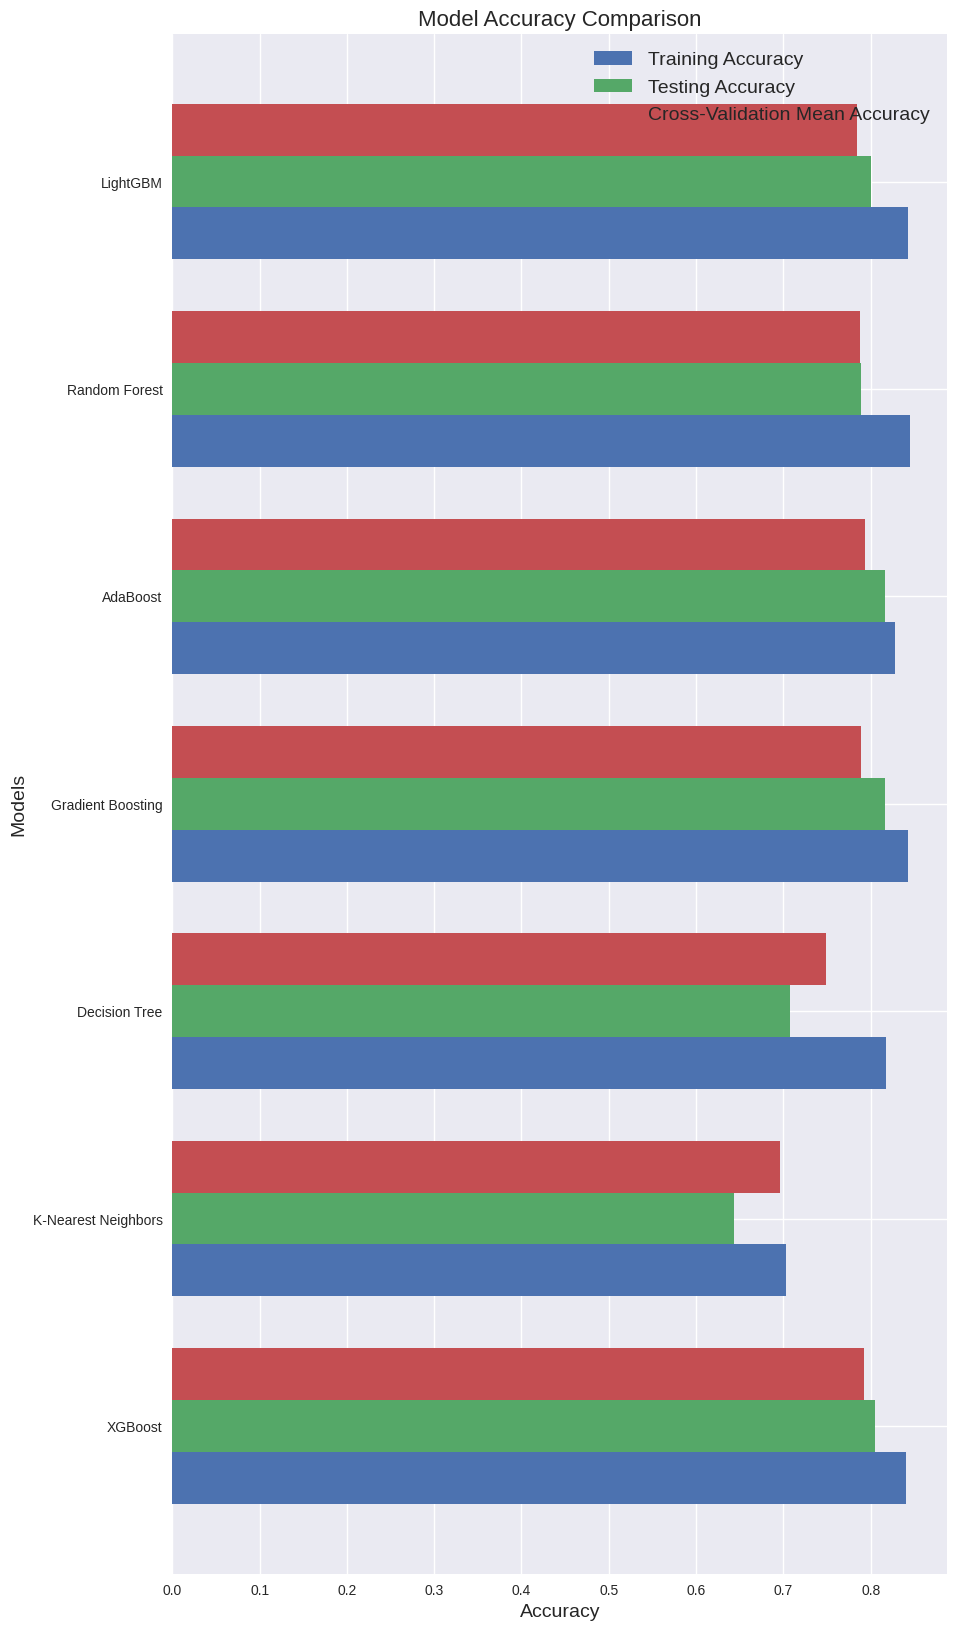

In [258]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a list of models
models = [
    ("XGBoost", xgb),
    ("K-Nearest Neighbors", knn),
    ("Decision Tree", dt),
    ("Gradient Boosting", gbc),
    ("AdaBoost", ada),
    ("Random Forest", rf),
    ("LightGBM", lgb)
]

# Create a list to store the training and testing accuracy for each model
training_accuracy = []
testing_accuracy = []
cv_scores_means = []

# Loop through each model, calculate the training and testing accuracy, and perform cross-validation
for name, model in models:
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_means.append(cv_scores.mean())

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Append the accuracy scores
    training_accuracy.append(model.score(X_train, y_train))
    testing_accuracy.append(model.score(X_test, y_test))

# Convert lists to numpy arrays for easier manipulation
training_accuracy = np.array(training_accuracy)
testing_accuracy = np.array(testing_accuracy)
cv_scores_means = np.array(cv_scores_means)

# Create a bar chart to compare the training, testing accuracy, and cross-validation mean scores for each model
plt.figure(figsize=(10, 20), facecolor='white')  # Set the background color to white
bar_width = 0.25
index = np.arange(len(models))

plt.barh(index, training_accuracy, bar_width, label="Training Accuracy")
plt.barh(index + bar_width, testing_accuracy, bar_width, label="Testing Accuracy")
plt.barh(index + 2 * bar_width, cv_scores_means, bar_width, label="Cross-Validation Mean Accuracy")

plt.yticks(index + bar_width, [model[0] for model in models])
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Models", fontsize=14)
plt.legend(fontsize=14)
plt.show()


## Graph of overall result summary for each classifiers

[LightGBM] [Info] Number of positive: 202, number of negative: 388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1926
[LightGBM] [Info] Number of data points in the train set: 590, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342373 -> initscore=-0.652738
[LightGBM] [Info] Start training from score -0.652738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

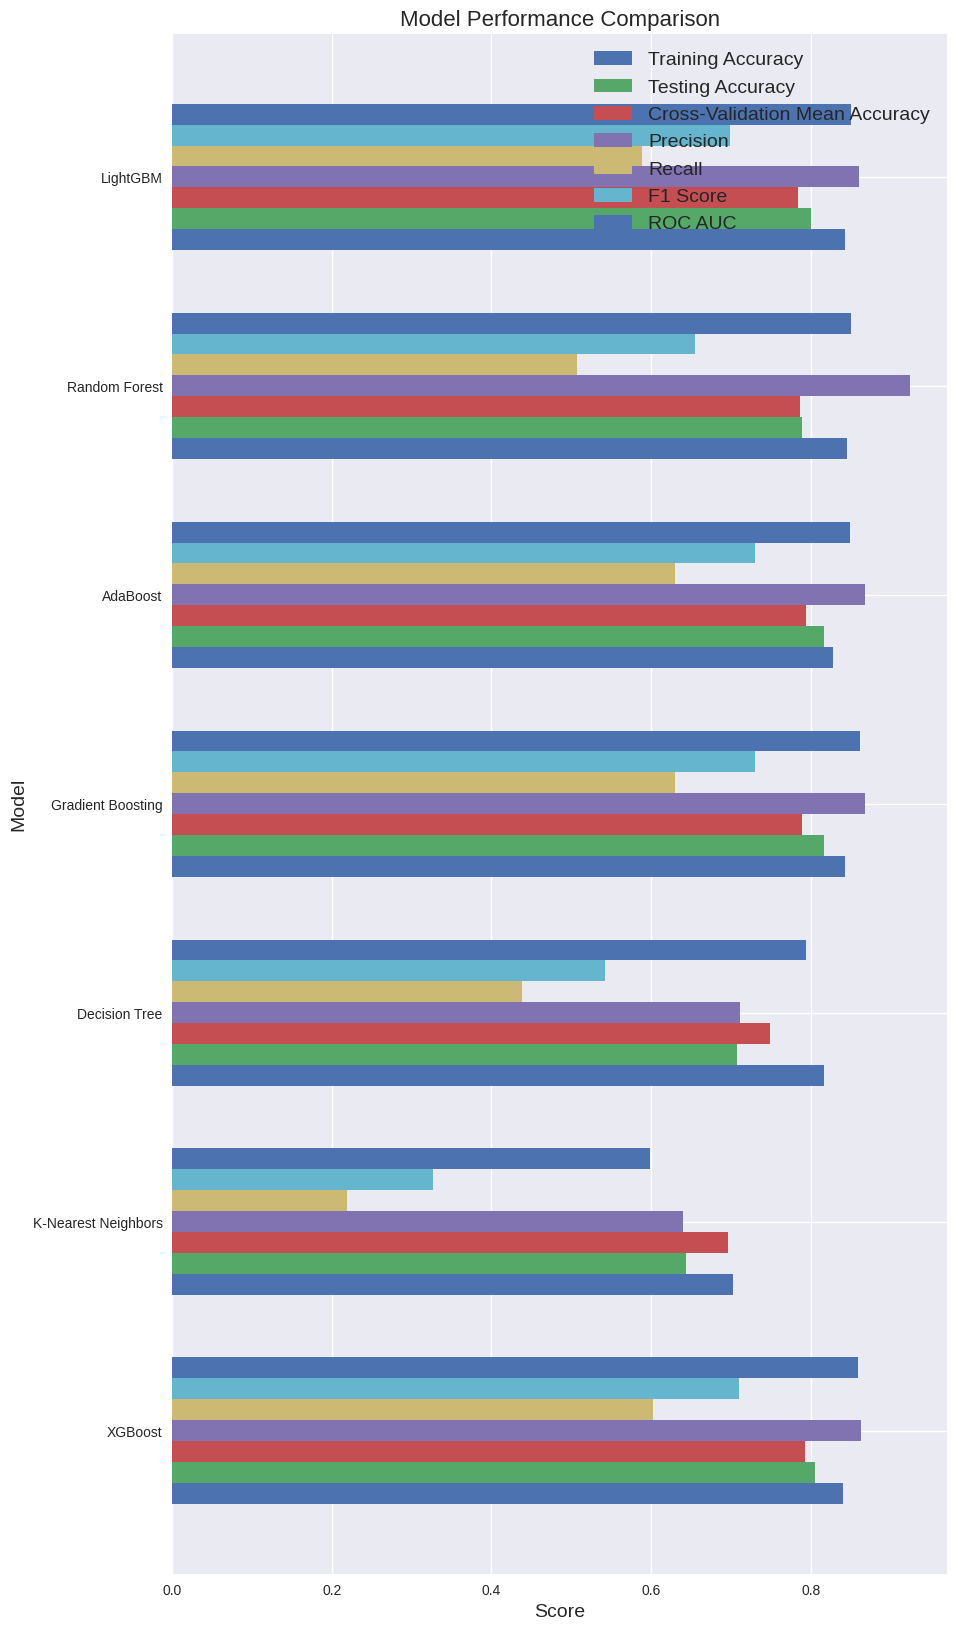

In [259]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Create a list of models
models = [
    ("XGBoost", xgb),
    ("K-Nearest Neighbors", knn),
    ("Decision Tree", dt),
    ("Gradient Boosting", gbc),
    ("AdaBoost", ada),
    ("Random Forest", rf),
    ("LightGBM", lgb)
]

# Initialize lists to store the metrics for each model
training_accuracy = []
testing_accuracy = []
cv_scores_means = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Loop through each model, calculate metrics and perform cross-validation
for name, model in models:
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_means.append(cv_scores.mean())

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate and store the metrics
    training_accuracy.append(model.score(X_train, y_train))
    testing_accuracy.append(model.score(X_test, y_test))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba))

# Convert lists to numpy arrays for easier manipulation
training_accuracy = np.array(training_accuracy)
testing_accuracy = np.array(testing_accuracy)
cv_scores_means = np.array(cv_scores_means)
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
f1_scores = np.array(f1_scores)
roc_auc_scores = np.array(roc_auc_scores)

# Plotting
metrics = ['Training Accuracy', 'Testing Accuracy', 'Cross-Validation Mean Accuracy',
           'Precision', 'Recall', 'F1 Score', 'ROC AUC']
values = [training_accuracy, testing_accuracy, cv_scores_means,
          precision_scores, recall_scores, f1_scores, roc_auc_scores]

plt.figure(figsize=(10, 20), facecolor='white')  # Set the background color to white
bar_width = 0.1
index = np.arange(len(models))

for i, value in enumerate(values):
    plt.barh(index + i * bar_width, value, bar_width, label=metrics[i])

plt.yticks(index + bar_width * (len(values) - 1) / 2, [model[0] for model in models])
plt.title("Model Performance Comparison", fontsize=16)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.legend(fontsize=14)
plt.show()


## Recciver Operating Characteristics(ROC) Curve of all Classifers

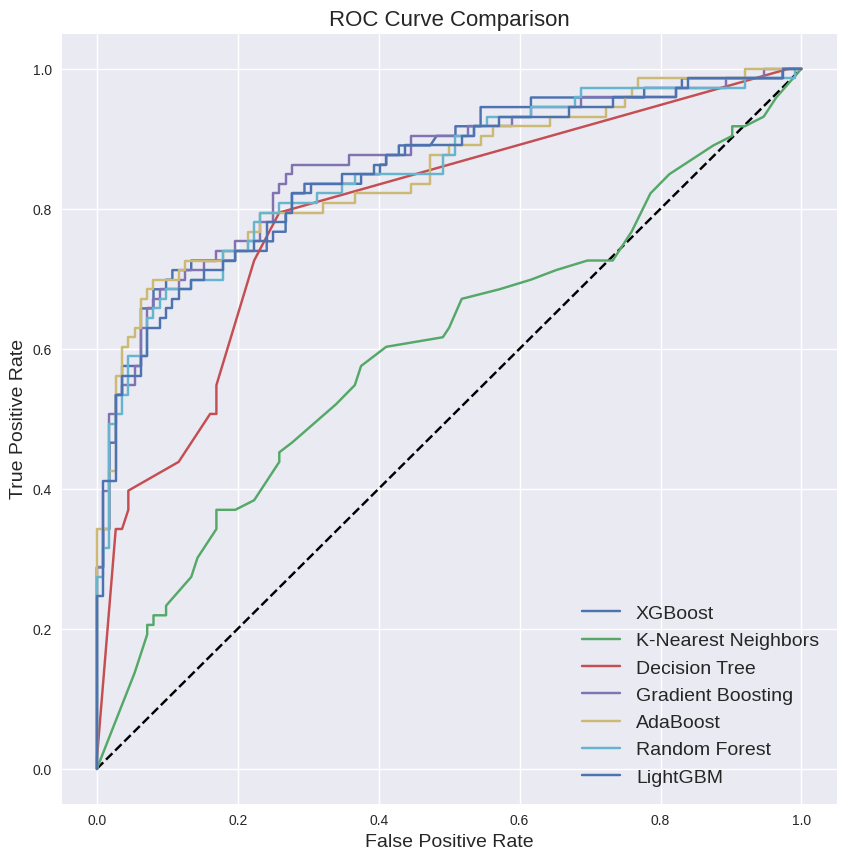

XGBoost AUC Score: 0.8592832681017614
K-Nearest Neighbors AUC Score: 0.5983365949119374
Decision Tree AUC Score: 0.7945205479452054
Gradient Boosting AUC Score: 0.861912915851272
AdaBoost AUC Score: 0.8499266144814089
Random Forest AUC Score: 0.8504158512720157
LightGBM AUC Score: 0.8505381604696672


In [264]:
# prompt: ROC curves of all classifer

# Create a list of models
models = [
    ("XGBoost", xgb),
    ("K-Nearest Neighbors", knn),
    ("Decision Tree", dt),
    ("Gradient Boosting", gbc),
    ("AdaBoost", ada),
    ("Random Forest", rf),
    ("LightGBM", lgb)
]

# Initialize lists to store the metrics for each model
fpr_list = []
tpr_list = []
auc_list = []

# Loop through each model
for name, model in models:
    # Predict probabilities on the test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate and store the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)

# Plot the ROC curves for each model
plt.figure(figsize=(10, 10), facecolor='white')  # Set the background color to white
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line

for i, model in enumerate(models):
    plt.plot(fpr_list[i], tpr_list[i], label=model[0])

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(fontsize=14)
plt.show()

# Print the AUC scores
for i, model in enumerate(models):
    print(f"{model[0]} AUC Score: {auc_list[i]}")


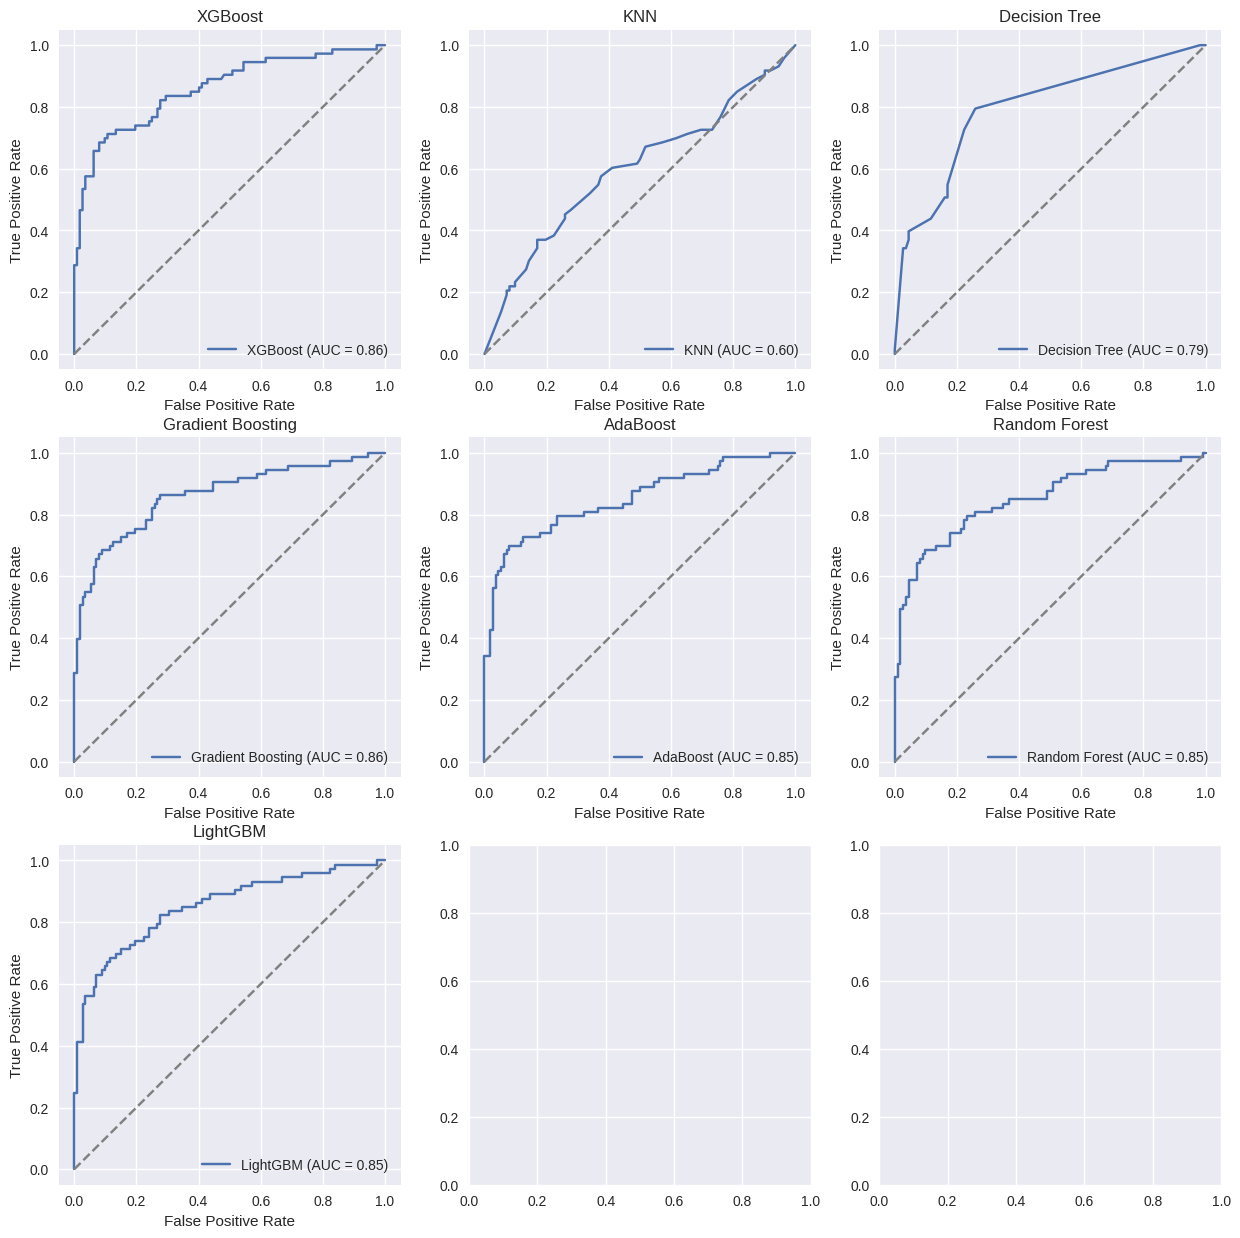

In [260]:
# prompt: ROC curves of all classifer

# Create a figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), facecolor='white')

# Define the models and their names
models = [
    (xgb, 'XGBoost'),
    (knn, 'KNN'),
    (dt, 'Decision Tree'),
    (gbc, 'Gradient Boosting'),
    (ada, 'AdaBoost'),
    (rf, 'Random Forest'),
    (lgb, 'LightGBM')
]

# Loop through each model and plot the ROC curve
for i, (model, name) in enumerate(models):
    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Plot the ROC curve
    axs[i // 3, i % 3].plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    axs[i // 3, i % 3].plot([0, 1], [0, 1], color='grey', linestyle='--')
    axs[i // 3, i % 3].set_title(name)
    axs[i // 3, i % 3].set_xlabel('False Positive Rate')
    axs[i // 3, i % 3].set_ylabel('True Positive Rate')
    axs[i // 3, i % 3].legend(loc='lower right')

# Show the plot
plt.show()
